# Частина перша: Знайомство з Pandas.

Прочитайте дані за допомогою методу `read_html` з таблиці ["Коефіцієнт народжуваності в регіонах України (1950—2019)"](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96)

Необхідно виконати:

* Вивести перші рядки таблиці за допомогою методу `head`
* Визначте кількість рядків та стовпців у датафреймі (атрибут `shape`)
* Замініть у таблиці значення "—" на значення `NaN`
* Визначте типи всіх стовпців за допомогою `dataframe.dtypes`
* Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
* Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` та `sum`)
* Видаліть з таблиці дані по всій країні, останній рядок таблиці
* Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод `fillna`)
* Отримайте список регіонів, де рівень народжуваності у 2014 році був вищим за середній по Україні
* У якому регіоні була найвища народжуваність у 2014 році?
* Побудуйте стовпчикову діаграму народжуваності по регіонах у 2014 році

# Imports

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# HTML Parsing

In [2]:
URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

data = pd.read_html(URL, match="Коефіцієнт народжуваності у регіонах України", thousands='.', decimal=',')

print(f"Find tables: {len(data)}\n")

work_df = data[0]

work_df.Name = "Коефіцієнт народжуваності у регіонах України"

work_df.index = work_df.index + 1

print(f"{work_df.Name.center(100)}\n")

work_df

Find tables: 1

                            Коефіцієнт народжуваності у регіонах України                            



,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
1,Автономна Республіка Крим,23.0,20.6,16.0,13.0,10.9,9.3,8.0,7.3,9.0,11.9,12.6,NaN
2,Вінницька область,22.4,19.2,14.2,12.4,11.9,10.7,10.3,8.4,9.0,10.8,11.2,10.9
3,Волинська область,24.7,25.0,17.9,15.3,15.0,13.7,12.5,11.2,11.9,14.8,14.8,14.1
4,Дніпропетровська область,20.4,20.4,15.1,12.3,10.6,9.2,8.0,7.1,8.9,11.0,11.2,11.1
5,Донецька область,27.1,21.4,14.0,10.9,9.4,8.2,7.0,6.1,7.6,9.8,9.8,8.2
6,Житомирська область,26.1,22.3,15.9,12.9,12.8,11.8,10.8,8.9,9.8,11.3,12.2,12.0
7,Закарпатська область,31.4,27.3,20.7,16.8,16.1,13.8,12.8,11.5,12.4,14.7,15.1,14.6
8,Запорізька область,21.9,19.7,15.0,12.4,10.7,9.2,8.1,7.1,8.5,10.3,10.6,10.6
9,Івано-Франківська область,24.3,24.8,18.2,15.5,14.4,13.1,12.2,10.3,10.7,12.3,12.4,12.2
10,Київська область,20.4,18.9,15.6,12.3,11.1,9.9,9.2,7.3,9.0,11.7,12.2,12.1


# Tasks

In [ ]:
# Вивести перші рядки таблиці за допомогою методу head

work_df.head(5)

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
1,Автономна Республіка Крим,23.0,20.6,16.0,13.0,10.9,9.3,8.0,7.3,9.0,11.9,12.6,NaN
2,Вінницька область,22.4,19.2,14.2,12.4,11.9,10.7,10.3,8.4,9.0,10.8,11.2,10.9
3,Волинська область,24.7,25.0,17.9,15.3,15.0,13.7,12.5,11.2,11.9,14.8,14.8,14.1
4,Дніпропетровська область,20.4,20.4,15.1,12.3,10.6,9.2,8.0,7.1,8.9,11.0,11.2,11.1
5,Донецька область,27.1,21.4,14.0,10.9,9.4,8.2,7.0,6.1,7.6,9.8,9.8,8.2


In [ ]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

work_df.shape

(28, 13)

In [ ]:
# Замініть у таблиці значення "—" на значення NaN

work_df.replace("-", np.nan)

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
1,Автономна Республіка Крим,23.0,20.6,16.0,13.0,10.9,9.3,8.0,7.3,9.0,11.9,12.6,NaN
2,Вінницька область,22.4,19.2,14.2,12.4,11.9,10.7,10.3,8.4,9.0,10.8,11.2,10.9
3,Волинська область,24.7,25.0,17.9,15.3,15.0,13.7,12.5,11.2,11.9,14.8,14.8,14.1
4,Дніпропетровська область,20.4,20.4,15.1,12.3,10.6,9.2,8.0,7.1,8.9,11.0,11.2,11.1
5,Донецька область,27.1,21.4,14.0,10.9,9.4,8.2,7.0,6.1,7.6,9.8,9.8,8.2
6,Житомирська область,26.1,22.3,15.9,12.9,12.8,11.8,10.8,8.9,9.8,11.3,12.2,12.0
7,Закарпатська область,31.4,27.3,20.7,16.8,16.1,13.8,12.8,11.5,12.4,14.7,15.1,14.6
8,Запорізька область,21.9,19.7,15.0,12.4,10.7,9.2,8.1,7.1,8.5,10.3,10.6,10.6
9,Івано-Франківська область,24.3,24.8,18.2,15.5,14.4,13.1,12.2,10.3,10.7,12.3,12.4,12.2
10,Київська область,20.4,18.9,15.6,12.3,11.1,9.9,9.2,7.3,9.0,11.7,12.2,12.1


In [ ]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

work_df.dtypes

регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
1992        int64
1994        int64
1996        int64
2000        int64
2004        int64
2008        int64
2012        int64
2014      float64
dtype: object

In [ ]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

tmp = work_df.fillna(0)

for column in work_df.columns[1:]:
  tmp = tmp.astype({column: "float64"})

tmp.dtypes

регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
1992      float64
1994      float64
1996      float64
2000      float64
2004      float64
2008      float64
2012      float64
2014      float64
dtype: object

In [60]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

(work_df.isnull().sum() / len(work_df) * 100).round(1)

регіон    0.0
1950      7.1
1960      3.6
1970      3.6
1990      0.0
1992      0.0
1994      0.0
1996      0.0
2000      0.0
2004      0.0
2008      0.0
2012      0.0
2014      7.1
dtype: float64

In [ ]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці

work_df.drop(*[work_df.tail(1).index])

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
1,Автономна Республіка Крим,23.0,20.6,16.0,13.0,10.9,9.3,8.0,7.3,9.0,11.9,12.6,NaN
2,Вінницька область,22.4,19.2,14.2,12.4,11.9,10.7,10.3,8.4,9.0,10.8,11.2,10.9
3,Волинська область,24.7,25.0,17.9,15.3,15.0,13.7,12.5,11.2,11.9,14.8,14.8,14.1
4,Дніпропетровська область,20.4,20.4,15.1,12.3,10.6,9.2,8.0,7.1,8.9,11.0,11.2,11.1
5,Донецька область,27.1,21.4,14.0,10.9,9.4,8.2,7.0,6.1,7.6,9.8,9.8,8.2
6,Житомирська область,26.1,22.3,15.9,12.9,12.8,11.8,10.8,8.9,9.8,11.3,12.2,12.0
7,Закарпатська область,31.4,27.3,20.7,16.8,16.1,13.8,12.8,11.5,12.4,14.7,15.1,14.6
8,Запорізька область,21.9,19.7,15.0,12.4,10.7,9.2,8.1,7.1,8.5,10.3,10.6,10.6
9,Івано-Франківська область,24.3,24.8,18.2,15.5,14.4,13.1,12.2,10.3,10.7,12.3,12.4,12.2
10,Київська область,20.4,18.9,15.6,12.3,11.1,9.9,9.2,7.3,9.0,11.7,12.2,12.1


In [ ]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

tmp = work_df

for column in work_df.columns[1:]:
  tmp = tmp.fillna({column: tmp[column].mean()}).round(1)

tmp

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
1,Автономна Республіка Крим,23.0,20.6,16.0,13.0,10.9,9.3,8.0,7.3,9.0,11.9,12.6,11.1
2,Вінницька область,22.4,19.2,14.2,12.4,11.9,10.7,10.3,8.4,9.0,10.8,11.2,10.9
3,Волинська область,24.7,25.0,17.9,15.3,15.0,13.7,12.5,11.2,11.9,14.8,14.8,14.1
4,Дніпропетровська область,20.4,20.4,15.1,12.3,10.6,9.2,8.0,7.1,8.9,11.0,11.2,11.1
5,Донецька область,27.1,21.4,14.0,10.9,9.4,8.2,7.0,6.1,7.6,9.8,9.8,8.2
6,Житомирська область,26.1,22.3,15.9,12.9,12.8,11.8,10.8,8.9,9.8,11.3,12.2,12.0
7,Закарпатська область,31.4,27.3,20.7,16.8,16.1,13.8,12.8,11.5,12.4,14.7,15.1,14.6
8,Запорізька область,21.9,19.7,15.0,12.4,10.7,9.2,8.1,7.1,8.5,10.3,10.6,10.6
9,Івано-Франківська область,24.3,24.8,18.2,15.5,14.4,13.1,12.2,10.3,10.7,12.3,12.4,12.2
10,Київська область,20.4,18.9,15.6,12.3,11.1,9.9,9.2,7.3,9.0,11.7,12.2,12.1


In [ ]:
# Отримайте список регіонів, де рівень народжуваності у 2014 році був вищим за середній по Україні

column_for_check = "2014"
index_column = "регіон"
value_for_check = work_df[column_for_check].tail(1).values.item()
tmp = pd.DataFrame(work_df[[index_column, column_for_check]])
tmp.dropna(inplace=True)

for index, value in tmp[column_for_check].items():
  if value < value_for_check:
    tmp.drop([index], inplace=True)

tmp

,регіон,2014
2,Вінницька область,10.9
3,Волинська область,14.1
4,Дніпропетровська область,11.1
6,Житомирська область,12.0
7,Закарпатська область,14.6
9,Івано-Франківська область,12.2
10,Київська область,12.1
11,Кіровоградська область,10.8
13,Львівська область,11.9
14,Миколаївська область,11.2


In [ ]:
# У якому регіоні була найвища народжуваність у 2014 році?

column_for_check = "2014"
index_column = "регіон"
tmp = pd.DataFrame(work_df[[index_column, column_for_check]])
id_max = tmp[column_for_check].idxmax()
tmp = tmp.loc[id_max]
tmp

регіон    Рівненська область
2014                    14.8
Name: 17, dtype: object

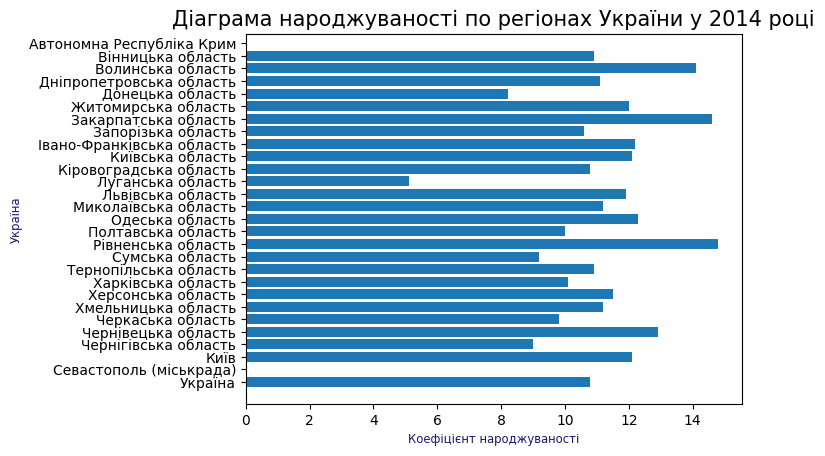

In [101]:
 # Побудуйте стовпчикову діаграму народжуваності по регіонах у 2014 році

year = "2014"
index_column = "регіон"

plt.barh(
    work_df[index_column].tolist()[::-1],
    work_df[year].tolist()[::-1],
)
plt.ylabel("Україна", fontsize="small", color="midnightblue",)
plt.xlabel("Коефіцієнт народжуваності", fontsize="small", color="midnightblue")
plt.title(f"Діаграма народжуваності по регіонах України у {year} році", fontsize=15)
plt.show()


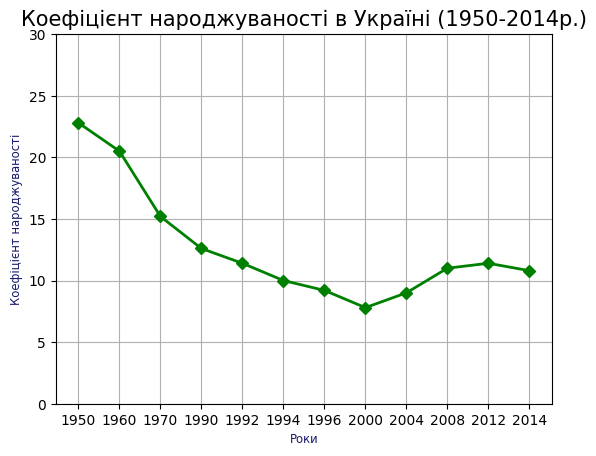

In [86]:
years = work_df.columns.to_list()[1:]
value = work_df.tail(1).values.tolist()[0][1:]

plt.plot(
    years,
    value,
    linestyle="-",
    color="green",
    linewidth=2,
    marker="D",
)
plt.ylim(0, 30)
plt.xlabel("Роки", fontsize="small", color="midnightblue")
plt.ylabel("Коефіцієнт народжуваності", fontsize="small", color="midnightblue")
plt.title("Коефіцієнт народжуваності в Україні (1950-2014р.)", fontsize=15)
plt.grid()
plt.show()

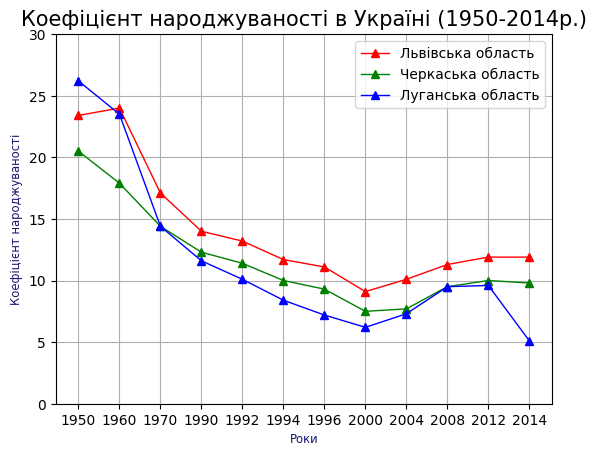

In [104]:
years = work_df.columns.to_list()[1:]
regions = ["Львівська область", "Черкаська область", "Луганська область"]

value_1 = work_df[work_df["регіон"] == regions[0]].values.tolist()[0][1:]
value_2 = work_df[work_df["регіон"] == regions[1]].values.tolist()[0][1:]
value_3 = work_df[work_df["регіон"] == regions[2]].values.tolist()[0][1:]

plt.plot(
    years,
    value_1,
    label=regions[0],
    linestyle="-",
    color="red",
    linewidth=1,
    marker="^",
)
plt.plot(
    years,
    value_2,
    label=regions[1],
    linestyle="-",
    color="green",
    linewidth=1,
    marker="^",
)
plt.plot(
    years,
    value_3,
    label=regions[2],
    linestyle="-",
    color="blue",
    linewidth=1,
    marker="^",
)
plt.ylim(0, 30)
plt.xlabel("Роки", fontsize="small", color="midnightblue")
plt.ylabel("Коефіцієнт народжуваності", fontsize="small", color="midnightblue")
plt.title("Коефіцієнт народжуваності в Україні (1950-2014р.)", fontsize=15)
plt.legend()
plt.grid()
plt.show()